In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
df = pd.read_csv("../dataset/carbon_emission_final_engineered.csv")
print("Original Shape:", df.shape)

Original Shape: (2109, 27)


In [16]:
drop_cols = ['co2_per_km', 'co2_per_litre', 'efficiency_score', 'high_emitter', 'low_efficiency', 'co2_tier']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)


In [17]:
cluster_features = [
    'distance_in_km_per_route', 'vehicle_age_in_years', 'load_factor',
    'no_of_stop', 'average_speed_in_km_per_hr',
    'adjusted_fuel_efficiency_in_km_litre', 'adjusted_energy_kwh_per_km',
    'fuel_per_km', 'total_energy_kwh', 'speed_per_stop',
    'load_utilization', 'c02_emission_kg'
]

X_cluster = df[cluster_features].dropna()


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


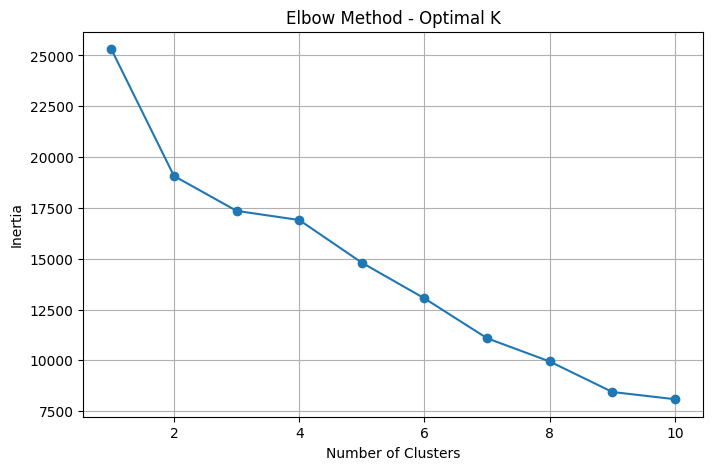

In [19]:
# Elbow Method to find optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method - Optimal K")
plt.grid(True)
plt.show()

In [20]:
# Apply KMeans with chosen k (e.g., k=3 or based on elbow)
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


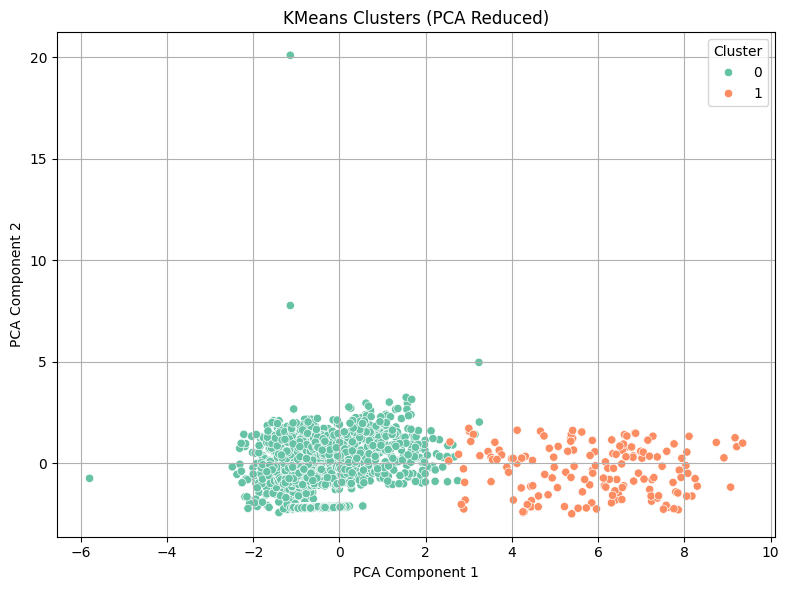

In [21]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2')
plt.title("KMeans Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend(title='Cluster')
plt.show()

In [22]:
# Analyze clusters
cluster_summary = df.groupby('cluster')[cluster_features + ['cluster']].mean()
print("\n📊 Cluster Summary:")
print(cluster_summary)


📊 Cluster Summary:
         distance_in_km_per_route  vehicle_age_in_years  load_factor  \
cluster                                                                
0                      203.862564              5.461026     0.613067   
1                     1216.037736             12.471698     0.586855   

         no_of_stop  average_speed_in_km_per_hr  \
cluster                                           
0         21.744615                   39.831174   
1          3.100629                  677.735849   

         adjusted_fuel_efficiency_in_km_litre  adjusted_energy_kwh_per_km  \
cluster                                                                     
0                                   12.192766                     0.04936   
1                                    4.850755                     0.03990   

         fuel_per_km  total_energy_kwh  speed_per_stop  load_utilization  \
cluster                                                                    
0           0.173738     

In [25]:
# Label clusters based on average CO₂ emission in each cluster
emission_means = df.groupby('cluster')['c02_emission_kg'].mean().sort_values()

# Map lowest to highest emission clusters to labels
emission_labels = {
    emission_means.index[0]: 'Low Emission',
    emission_means.index[1]: 'High Emission'
}

df['emission_group'] = df['cluster'].map(emission_labels)


In [26]:
print("\n📌 Cluster Group Sizes:")
print(df['emission_group'].value_counts())



📌 Cluster Group Sizes:
emission_group
Low Emission     1950
High Emission     159
Name: count, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_7740\3137618648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='emission_group', y='c02_emission_kg', palette='Set2')


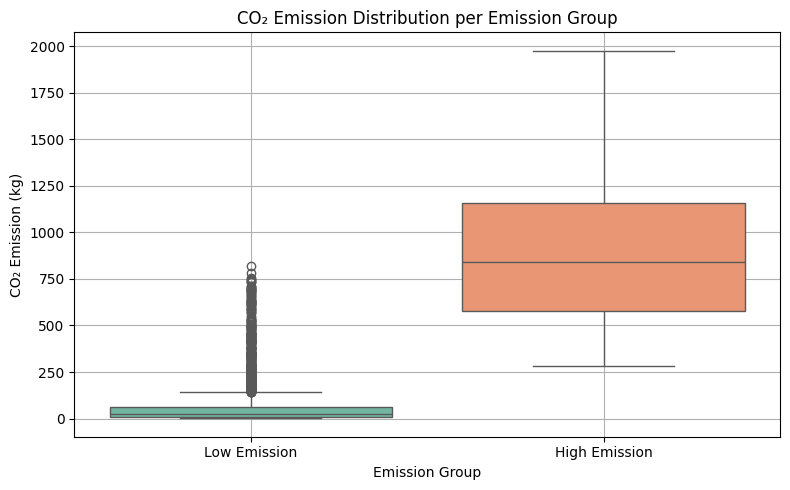

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='emission_group', y='c02_emission_kg', palette='Set2')
plt.title("CO₂ Emission Distribution per Emission Group")
plt.xlabel("Emission Group")
plt.ylabel("CO₂ Emission (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_7740\2792396314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='emission_group', y='load_factor', palette='Set3')


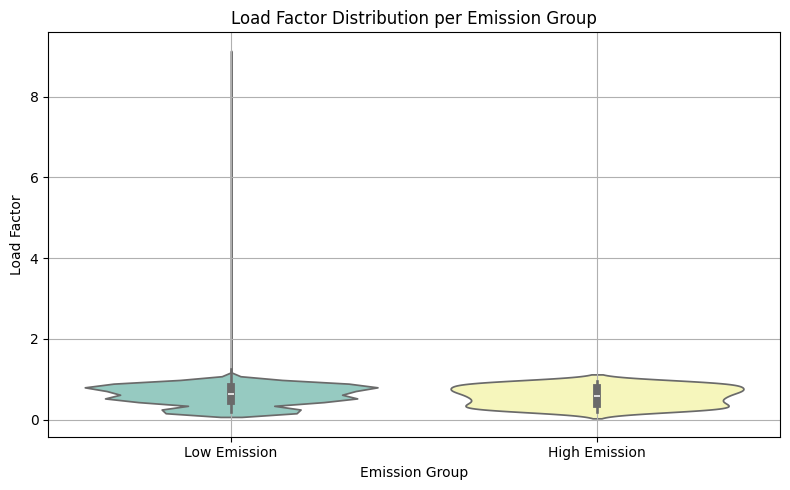

In [28]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='emission_group', y='load_factor', palette='Set3')
plt.title("Load Factor Distribution per Emission Group")
plt.xlabel("Emission Group")
plt.ylabel("Load Factor")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_7740\494012950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='emission_group', y='average_speed_in_km_per_hr', palette='coolwarm')


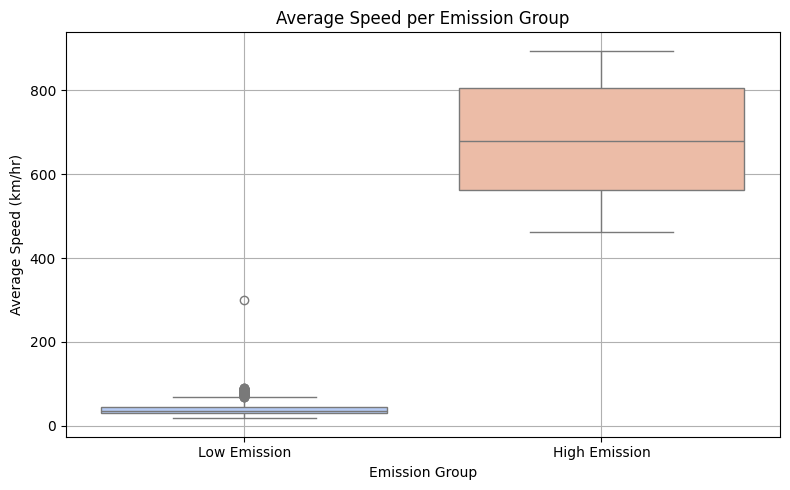

In [29]:
# %% Visualize average speed per emission group
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='emission_group', y='average_speed_in_km_per_hr', palette='coolwarm')
plt.title("Average Speed per Emission Group")
plt.xlabel("Emission Group")
plt.ylabel("Average Speed (km/hr)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_7740\113176712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='emission_group', y='vehicle_age_in_years', palette='Set1')


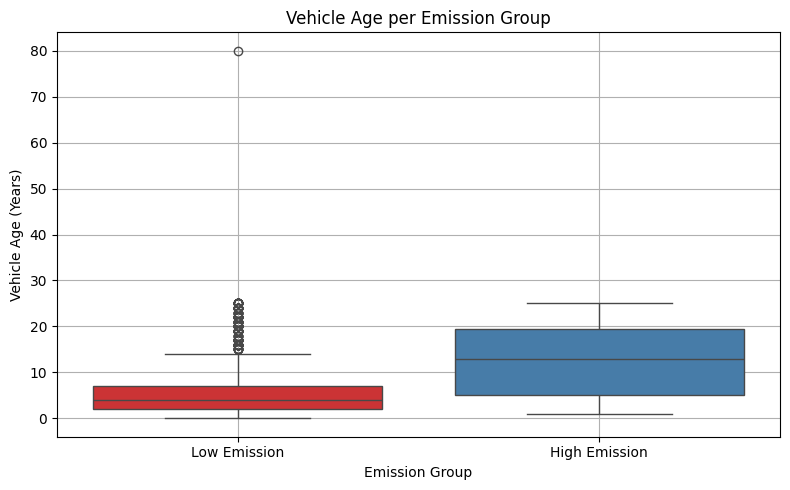

In [30]:
# %% Visualize vehicle age per emission group
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='emission_group', y='vehicle_age_in_years', palette='Set1')
plt.title("Vehicle Age per Emission Group")
plt.xlabel("Emission Group")
plt.ylabel("Vehicle Age (Years)")
plt.grid(True)
plt.tight_layout()
plt.show()

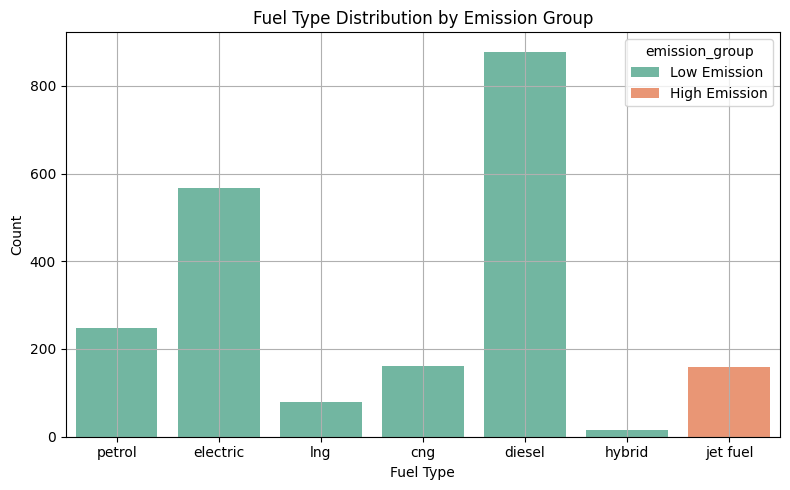

In [31]:
# %% Visualize fuel type distribution (countplot)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='fuel_type', hue='emission_group', palette='Set2')
plt.title("Fuel Type Distribution by Emission Group")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

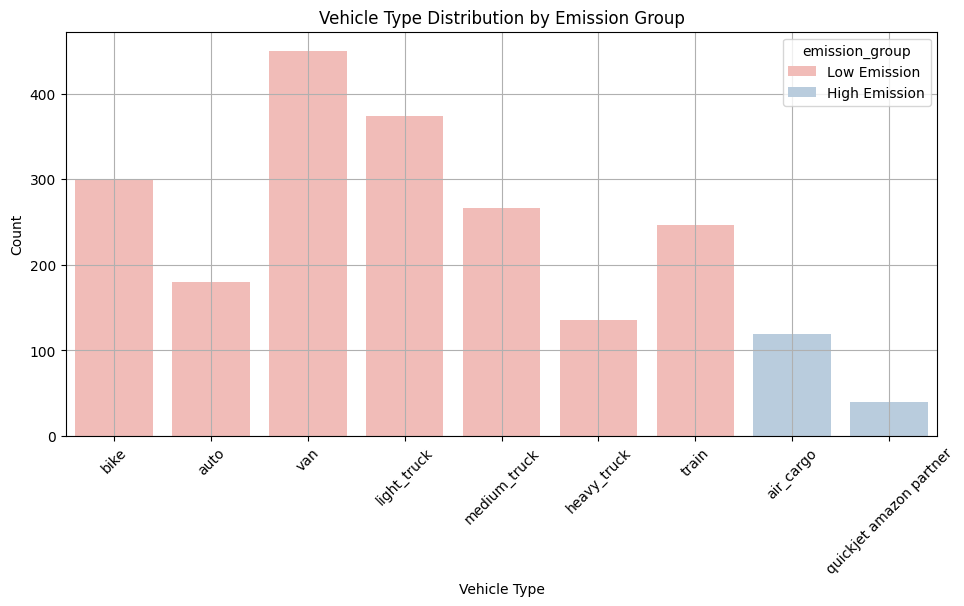

In [32]:
# %% Visualize vehicle type distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='vehicle_type', hue='emission_group', palette='Pastel1')
plt.title("Vehicle Type Distribution by Emission Group")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


📊 Emission Group Feature Means:


emission_group,High Emission,Low Emission
distance_in_km_per_route,1216.037736,203.862564
vehicle_age_in_years,12.471698,5.461026
load_factor,0.586855,0.613067
no_of_stop,3.100629,21.744615
average_speed_in_km_per_hr,677.735849,39.831174
adjusted_fuel_efficiency_in_km_litre,4.850755,12.192766
adjusted_energy_kwh_per_km,0.039900,0.049360
fuel_per_km,0.251085,0.173738
total_energy_kwh,5.119900,6.003289
speed_per_stop,301.543082,4.630690


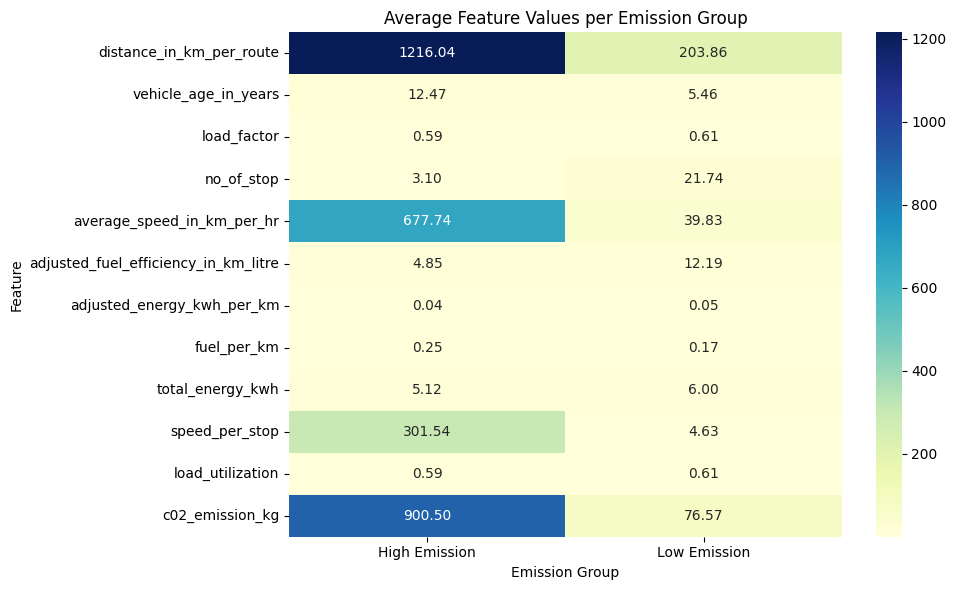

In [33]:
# %% Cluster profiling with means
cluster_profile = df.groupby('emission_group')[cluster_features].mean().T
print("\n📊 Emission Group Feature Means:")
display(cluster_profile)

# Optional: visualize as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Feature Values per Emission Group")
plt.ylabel("Feature")
plt.xlabel("Emission Group")
plt.tight_layout()
plt.show()
